In [25]:
## 10 인공 신경망 소개 ##
import tensorflow as tf

## GPU 메모리 관리 ##
#1번 방법
config = tf.ConfigProto()
config.gpu_options.allow_growth = True #메모리 수요에 따라 할당

'''주의할 점은, 이 옵션은 메모리의 증식만 가능하다는 것. 연산이 끝나고 메모리가 필요없는 상황이라고 해서 할당된 메모리를 반납하지 않는다. 

Tensorflow 측에서는 그럴 경우 더 심한 메모리 파편화를 일으킬 수도 있다고 하니 판단은 독자의 몫.'''

'주의할 점은, 이 옵션은 메모리의 증식만 가능하다는 것. 연산이 끝나고 메모리가 필요없는 상황이라고 해서 할당된 메모리를 반납하지 않는다. \n\nTensorflow 측에서는 그럴 경우 더 심한 메모리 파편화를 일으킬 수도 있다고 하니 판단은 독자의 몫.'

In [ ]:
## 10.1.3 퍼셉트론 ##
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

iris = load_iris()
X = iris.data[:, (2, 3)] #꽃잎의 길이와 너비
Y = (iris.target == 0).astype(np.int) #Iris Setosa 인가?

per_clf = Perceptron(random_state=42) #데이터 섞어서 훈련
per_clf.fit(X, Y)

y_pred = per_clf.predict([[2, 0.5]])
y_pred

#퍼셉트론은 클래스 확률을 제공하지 않으며 고정된 임계값을 기준으로 예측

<h2><b>활성화 함수</b></h2>

![activation](img/activation.png)

In [7]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def relu(z):
    return np.maximum(0, z)

def derivative(f, z, eps=0.000001):
    return (f(z + eps) - f(z - eps))/(2 * eps)

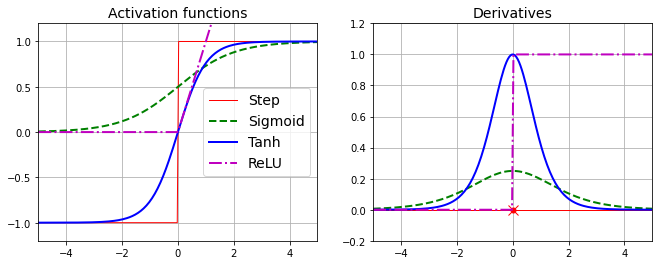

In [16]:
from matplotlib import pyplot as plt

z = np.linspace(-5, 5, 200)

plt.figure(figsize=(11,4))

plt.subplot(121)
plt.plot(z, np.sign(z), "r-", linewidth=1, label="Step")
plt.plot(z, sigmoid(z), "g--", linewidth=2, label="Sigmoid")
plt.plot(z, np.tanh(z), "b-", linewidth=2, label="Tanh")
plt.plot(z, relu(z), "m-.", linewidth=2, label="ReLU")
plt.grid(True)
plt.legend(loc="center right", fontsize=14)
plt.title("Activation functions", fontsize=14)
plt.axis([-5, 5, -1.2, 1.2])

plt.subplot(122)
plt.plot(z, derivative(np.sign, z), "r-", linewidth=1, label="Step")
plt.plot(0, 0, "ro", markersize=5)
plt.plot(0, 0, "rx", markersize=10)
plt.plot(z, derivative(sigmoid, z), "g--", linewidth=2, label="Sigmoid")
plt.plot(z, derivative(np.tanh, z), "b-", linewidth=2, label="Tanh")
plt.plot(z, derivative(relu, z), "m-.", linewidth=2, label="ReLU")
plt.grid(True)
#plt.legend(loc="center right", fontsize=14)
plt.title("Derivatives", fontsize=14)
plt.axis([-5, 5, -0.2, 1.2])

plt.show()

In [35]:
## 10.2 텐서플로의 고수준 API로 다층 퍼셉트론 훈련하기 ##
# MNIST Dataset Load!
(X_train, Y_train), (X_test, Y_test) = tf.keras.datasets.mnist.load_data()

# reshape : 28 x 28 -> 784
X_train = X_train.astype(np.float32).reshape(-1, 28*28) / 255.0
X_test = X_test.astype(np.float32).reshape(-1, 28*28) / 255.0
Y_train = Y_train.astype(np.int32)
Y_test = Y_test.astype(np.int32)

# split validation set
X_valid, X_train = X_train[:5000], X_train[5000:]
Y_valid, Y_train = Y_train[:5000], Y_train[5000:]

In [41]:
feature_cols = tf.contrib.learn.infer_real_valued_columns_from_input(X_train)
    #정수 또는 실수로 된 특성을 매핑하기 위한 FeatureColumn 객체 생성, 실수값으로 된 열을 만들어 줌
dnn_clf1 = tf.contrib.learn.DNNClassifier(hidden_units=[300, 100], n_classes=10, #1번 은닉층 300개 뉴런, 2층 은닉층 100개 뉴런, 출력 10개
                                         feature_columns=feature_cols, model_dir="model_dir")
dnn_clf1 = tf.contrib.learn.SKCompat(dnn_clf1) #sklearn인터페이스와 호환되게 SKCompat으로 형변환
dnn_clf1.fit(X_train, Y_train, batch_size=50, steps=40000)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000002258A648A58>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_train_distribute': None, '_eval_distribute': None, '_experimental_max_worker_delay_secs': None, '_device_fn': None, '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1.0
}
, '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_log_step_count_steps': 100, '_protocol': None, '_session_config': None, '_save_checkpoints_steps': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_model_dir': 'model_dir', '_session_creation_timeout_secs': 7200}
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from model_dir\model.ckpt-800

INFO:tensorflow:global_step/sec: 624.199
INFO:tensorflow:loss = 0.00017168319, step = 86900 (0.161 sec)
INFO:tensorflow:global_step/sec: 601.552
INFO:tensorflow:loss = 0.00027600946, step = 87000 (0.166 sec)
INFO:tensorflow:global_step/sec: 607.617
INFO:tensorflow:loss = 8.78362e-05, step = 87100 (0.164 sec)
INFO:tensorflow:global_step/sec: 605.457
INFO:tensorflow:loss = 0.0004095458, step = 87200 (0.165 sec)
INFO:tensorflow:global_step/sec: 608.587
INFO:tensorflow:loss = 0.00017523447, step = 87300 (0.165 sec)
INFO:tensorflow:global_step/sec: 593.239
INFO:tensorflow:loss = 6.827275e-05, step = 87400 (0.168 sec)
INFO:tensorflow:global_step/sec: 609.68
INFO:tensorflow:loss = 0.00016199776, step = 87500 (0.163 sec)
INFO:tensorflow:global_step/sec: 624.922
INFO:tensorflow:loss = 0.0002594662, step = 87600 (0.161 sec)
INFO:tensorflow:global_step/sec: 619.438
INFO:tensorflow:loss = 0.00022610024, step = 87700 (0.161 sec)
INFO:tensorflow:global_step/sec: 603.855
INFO:tensorflow:loss = 0.0001

INFO:tensorflow:loss = 5.1883013e-05, step = 94800 (0.172 sec)
INFO:tensorflow:global_step/sec: 573.627
INFO:tensorflow:loss = 0.00017714272, step = 94900 (0.174 sec)
INFO:tensorflow:global_step/sec: 584.199
INFO:tensorflow:loss = 5.253074e-05, step = 95000 (0.171 sec)
INFO:tensorflow:global_step/sec: 604.339
INFO:tensorflow:loss = 0.000110546, step = 95100 (0.164 sec)
INFO:tensorflow:global_step/sec: 617.215
INFO:tensorflow:loss = 8.047533e-05, step = 95200 (0.163 sec)
INFO:tensorflow:global_step/sec: 605.945
INFO:tensorflow:loss = 0.00011948494, step = 95300 (0.164 sec)
INFO:tensorflow:global_step/sec: 602.368
INFO:tensorflow:loss = 7.373747e-05, step = 95400 (0.167 sec)
INFO:tensorflow:global_step/sec: 609.666
INFO:tensorflow:loss = 0.00027516653, step = 95500 (0.164 sec)
INFO:tensorflow:global_step/sec: 617.247
INFO:tensorflow:loss = 0.00019590929, step = 95600 (0.161 sec)
INFO:tensorflow:global_step/sec: 609.657
INFO:tensorflow:loss = 0.0003278116, step = 95700 (0.165 sec)
INFO:te

INFO:tensorflow:loss = 5.9237085e-05, step = 102700 (0.163 sec)
INFO:tensorflow:global_step/sec: 595.62
INFO:tensorflow:loss = 0.00010368465, step = 102800 (0.167 sec)
INFO:tensorflow:global_step/sec: 606.008
INFO:tensorflow:loss = 0.00021214812, step = 102900 (0.166 sec)
INFO:tensorflow:global_step/sec: 578.415
INFO:tensorflow:loss = 9.0785485e-05, step = 103000 (0.172 sec)
INFO:tensorflow:global_step/sec: 594.859
INFO:tensorflow:loss = 0.00036213928, step = 103100 (0.168 sec)
INFO:tensorflow:global_step/sec: 598.335
INFO:tensorflow:loss = 0.00017564041, step = 103200 (0.168 sec)
INFO:tensorflow:global_step/sec: 565.112
INFO:tensorflow:loss = 0.00026069177, step = 103300 (0.176 sec)
INFO:tensorflow:global_step/sec: 574.639
INFO:tensorflow:loss = 6.155718e-05, step = 103400 (0.174 sec)
INFO:tensorflow:global_step/sec: 568.102
INFO:tensorflow:loss = 0.00010937137, step = 103500 (0.177 sec)
INFO:tensorflow:global_step/sec: 577.964
INFO:tensorflow:loss = 6.5514505e-05, step = 103600 (0.17

INFO:tensorflow:global_step/sec: 574.699
INFO:tensorflow:loss = 0.0002051945, step = 110600 (0.173 sec)
INFO:tensorflow:global_step/sec: 574.883
INFO:tensorflow:loss = 0.00010569586, step = 110700 (0.175 sec)
INFO:tensorflow:global_step/sec: 578.481
INFO:tensorflow:loss = 0.00016066598, step = 110800 (0.172 sec)
INFO:tensorflow:global_step/sec: 598.213
INFO:tensorflow:loss = 0.00024072222, step = 110900 (0.168 sec)
INFO:tensorflow:global_step/sec: 579.993
INFO:tensorflow:loss = 0.00017104708, step = 111000 (0.172 sec)
INFO:tensorflow:global_step/sec: 594.115
INFO:tensorflow:loss = 0.00010169168, step = 111100 (0.168 sec)
INFO:tensorflow:global_step/sec: 578.95
INFO:tensorflow:loss = 9.448439e-05, step = 111200 (0.173 sec)
INFO:tensorflow:global_step/sec: 583.053
INFO:tensorflow:loss = 0.0001090907, step = 111300 (0.172 sec)
INFO:tensorflow:global_step/sec: 534.549
INFO:tensorflow:loss = 0.00016318033, step = 111400 (0.187 sec)
INFO:tensorflow:global_step/sec: 526.885
INFO:tensorflow:lo

INFO:tensorflow:loss = 5.698798e-05, step = 118400 (0.163 sec)
INFO:tensorflow:global_step/sec: 568.444
INFO:tensorflow:loss = 0.000112353504, step = 118500 (0.175 sec)
INFO:tensorflow:global_step/sec: 525.916
INFO:tensorflow:loss = 0.00017466437, step = 118600 (0.191 sec)
INFO:tensorflow:global_step/sec: 545.165
INFO:tensorflow:loss = 0.0001455958, step = 118700 (0.183 sec)
INFO:tensorflow:global_step/sec: 603.843
INFO:tensorflow:loss = 1.3083066e-05, step = 118800 (0.166 sec)
INFO:tensorflow:global_step/sec: 602.33
INFO:tensorflow:loss = 0.00025585984, step = 118900 (0.166 sec)
INFO:tensorflow:global_step/sec: 574.669
INFO:tensorflow:loss = 2.3271778e-05, step = 119000 (0.174 sec)
INFO:tensorflow:global_step/sec: 609.697
INFO:tensorflow:loss = 0.00011431094, step = 119100 (0.164 sec)
INFO:tensorflow:global_step/sec: 555.452
INFO:tensorflow:loss = 9.737717e-05, step = 119200 (0.180 sec)
INFO:tensorflow:global_step/sec: 547.476
INFO:tensorflow:loss = 4.7695452e-05, step = 119300 (0.182

SKCompat()

In [44]:
from sklearn.metrics import accuracy_score

y_pred = dnn_clf1.predict(X_test)
accuracy_score(Y_test, y_pred['classes'])

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from model_dir\model.ckpt-120000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


0.9825

In [45]:
##위와 동일한 코드##
# TF Estimator
feature_cols = [tf.feature_column.numeric_column("X", shape=[28 * 28])]
dnn_clf2 = tf.estimator.DNNClassifier(hidden_units=[300, 100], n_classes=10,
                                     feature_columns=feature_cols)

# input function
input_fn = tf.estimator.inputs.numpy_input_fn(
    x={"X": X_train}, y=Y_train, num_epochs=40, batch_size=50, shuffle=True)

# training
dnn_clf2.train(input_fn=input_fn)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\Sun\\AppData\\Local\\Temp\\tmpx4n688e3', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000002258EE23860>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
INFO:tensorflow:Cal

INFO:tensorflow:loss = 0.34855914, step = 6900 (0.316 sec)
INFO:tensorflow:global_step/sec: 312.503
INFO:tensorflow:loss = 0.4286468, step = 7000 (0.320 sec)
INFO:tensorflow:global_step/sec: 317.265
INFO:tensorflow:loss = 0.339561, step = 7100 (0.315 sec)
INFO:tensorflow:global_step/sec: 313.75
INFO:tensorflow:loss = 0.23421778, step = 7200 (0.319 sec)
INFO:tensorflow:global_step/sec: 308.641
INFO:tensorflow:loss = 0.28548875, step = 7300 (0.324 sec)
INFO:tensorflow:global_step/sec: 308.232
INFO:tensorflow:loss = 2.0370939, step = 7400 (0.325 sec)
INFO:tensorflow:global_step/sec: 314.223
INFO:tensorflow:loss = 0.20298883, step = 7500 (0.318 sec)
INFO:tensorflow:global_step/sec: 310.944
INFO:tensorflow:loss = 0.5214391, step = 7600 (0.321 sec)
INFO:tensorflow:global_step/sec: 314.85
INFO:tensorflow:loss = 0.95628285, step = 7700 (0.319 sec)
INFO:tensorflow:global_step/sec: 315.054
INFO:tensorflow:loss = 1.222718, step = 7800 (0.317 sec)
INFO:tensorflow:global_step/sec: 310.399
INFO:tens

INFO:tensorflow:loss = 0.042414665, step = 15100 (0.375 sec)
INFO:tensorflow:global_step/sec: 243.864
INFO:tensorflow:loss = 0.08843778, step = 15200 (0.408 sec)
INFO:tensorflow:global_step/sec: 267.064
INFO:tensorflow:loss = 0.3294653, step = 15300 (0.375 sec)
INFO:tensorflow:global_step/sec: 267.731
INFO:tensorflow:loss = 0.027930893, step = 15400 (0.374 sec)
INFO:tensorflow:global_step/sec: 263.032
INFO:tensorflow:loss = 0.5021565, step = 15500 (0.380 sec)
INFO:tensorflow:global_step/sec: 269.633
INFO:tensorflow:loss = 0.1543211, step = 15600 (0.371 sec)
INFO:tensorflow:global_step/sec: 262.507
INFO:tensorflow:loss = 0.096332036, step = 15700 (0.381 sec)
INFO:tensorflow:global_step/sec: 267.933
INFO:tensorflow:loss = 0.23949201, step = 15800 (0.373 sec)
INFO:tensorflow:global_step/sec: 267.194
INFO:tensorflow:loss = 0.39453828, step = 15900 (0.373 sec)
INFO:tensorflow:global_step/sec: 268.496
INFO:tensorflow:loss = 0.096774496, step = 16000 (0.372 sec)
INFO:tensorflow:global_step/se

INFO:tensorflow:loss = 0.08109581, step = 23200 (0.321 sec)
INFO:tensorflow:global_step/sec: 303.912
INFO:tensorflow:loss = 0.059107292, step = 23300 (0.329 sec)
INFO:tensorflow:global_step/sec: 309.553
INFO:tensorflow:loss = 0.021470595, step = 23400 (0.323 sec)
INFO:tensorflow:global_step/sec: 309.707
INFO:tensorflow:loss = 0.050632045, step = 23500 (0.323 sec)
INFO:tensorflow:global_step/sec: 305.773
INFO:tensorflow:loss = 0.08116517, step = 23600 (0.327 sec)
INFO:tensorflow:global_step/sec: 313.434
INFO:tensorflow:loss = 0.059781898, step = 23700 (0.319 sec)
INFO:tensorflow:global_step/sec: 301.814
INFO:tensorflow:loss = 0.015741916, step = 23800 (0.331 sec)
INFO:tensorflow:global_step/sec: 288.519
INFO:tensorflow:loss = 0.09524077, step = 23900 (0.347 sec)
INFO:tensorflow:global_step/sec: 304.706
INFO:tensorflow:loss = 0.0493092, step = 24000 (0.328 sec)
INFO:tensorflow:global_step/sec: 285.834
INFO:tensorflow:loss = 0.027094906, step = 24100 (0.350 sec)
INFO:tensorflow:global_ste

INFO:tensorflow:loss = 0.013115404, step = 31300 (0.321 sec)
INFO:tensorflow:global_step/sec: 307.897
INFO:tensorflow:loss = 0.03918666, step = 31400 (0.325 sec)
INFO:tensorflow:global_step/sec: 311.582
INFO:tensorflow:loss = 0.052349508, step = 31500 (0.321 sec)
INFO:tensorflow:global_step/sec: 309.213
INFO:tensorflow:loss = 0.026820213, step = 31600 (0.323 sec)
INFO:tensorflow:global_step/sec: 310.712
INFO:tensorflow:loss = 0.0021447542, step = 31700 (0.323 sec)
INFO:tensorflow:global_step/sec: 311.541
INFO:tensorflow:loss = 0.024058247, step = 31800 (0.321 sec)
INFO:tensorflow:global_step/sec: 312.526
INFO:tensorflow:loss = 0.030784035, step = 31900 (0.320 sec)
INFO:tensorflow:global_step/sec: 312.61
INFO:tensorflow:loss = 0.070542485, step = 32000 (0.320 sec)
INFO:tensorflow:global_step/sec: 309.485
INFO:tensorflow:loss = 0.05219549, step = 32100 (0.323 sec)
INFO:tensorflow:global_step/sec: 312.454
INFO:tensorflow:loss = 0.01411287, step = 32200 (0.319 sec)
INFO:tensorflow:global_s

INFO:tensorflow:global_step/sec: 312.37
INFO:tensorflow:loss = 0.03491695, step = 39400 (0.319 sec)
INFO:tensorflow:global_step/sec: 311.569
INFO:tensorflow:loss = 0.004440305, step = 39500 (0.322 sec)
INFO:tensorflow:global_step/sec: 311.633
INFO:tensorflow:loss = 0.0032343422, step = 39600 (0.320 sec)
INFO:tensorflow:global_step/sec: 310.507
INFO:tensorflow:loss = 0.045980543, step = 39700 (0.322 sec)
INFO:tensorflow:global_step/sec: 310.554
INFO:tensorflow:loss = 0.022671727, step = 39800 (0.322 sec)
INFO:tensorflow:global_step/sec: 311.713
INFO:tensorflow:loss = 0.0070867524, step = 39900 (0.321 sec)
INFO:tensorflow:global_step/sec: 312.168
INFO:tensorflow:loss = 0.013070691, step = 40000 (0.321 sec)
INFO:tensorflow:global_step/sec: 313.472
INFO:tensorflow:loss = 0.02895378, step = 40100 (0.319 sec)
INFO:tensorflow:global_step/sec: 313.789
INFO:tensorflow:loss = 0.0056205364, step = 40200 (0.318 sec)
INFO:tensorflow:global_step/sec: 313.482
INFO:tensorflow:loss = 0.007182123, step 

In [56]:
# Test input function
test_input_fn = tf.estimator.inputs.numpy_input_fn(
    x={"X": X_test}, y=Y_test, shuffle=False)

# Test
eval_results = dnn_clf2.evaluate(input_fn=test_input_fn)
eval_results

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2020-10-14T15:55:19Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\Sun\AppData\Local\Temp\tmpx4n688e3\model.ckpt-44000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2020-10-14-15:55:19
INFO:tensorflow:Saving dict for global step 44000: accuracy = 0.9798, average_loss = 0.09954319, global_step = 44000, loss = 12.600404
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 44000: C:\Users\Sun\AppData\Local\Temp\tmpx4n688e3\model.ckpt-44000


{'accuracy': 0.9798,
 'average_loss': 0.09954319,
 'loss': 12.600404,
 'global_step': 44000}